In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate as interp
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [7]:
dmo = json.load(open('../../sim_RC_12/Output/resdicts/dmo_sim_dict.json','r'))
for gal in dmo:
    dmo[gal]['core_fit'] = dmo[gal]['sidm_fit']
    dmo[gal]['cusp_fit'] = dmo[gal]['nfw_fit']
bry = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))
# sparcd = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_fit_dict.json','r'))
sparcd = json.load(open('../Output/sparc_new_dict.json','r'))

In [8]:
LM = np.zeros([15,15])
RN = np.zeros([15,15])
for lm_i in range(15):
    for rn_i in range(15):
        LM[lm_i,rn_i] = lm_i
        RN[lm_i,rn_i] = 14-rn_i
masses = np.array([9.0,9.3,9.6,9.9,10.2,10.5,10.8,11.1,11.4,11.7,12.0,12.3,12.6,12.9,13.2,13.5])
radius = np.array([0.2,0.4,0.6,0.8,1.0,1.4,1.8,2.2,2.6,3.0,3.4,3.8,4.2,4.6,5.0,5.4])
mass = 0.5*(masses[:-1]+masses[1:])
rad = 0.5*(radius[:-1]+radius[1:])
new_radius = [radius[-i-1] for i in range(len(radius))]
data = [[(1.,1.,1.) for i in range(16)] for i in range(16)]

lsig_edges = np.array([-2,-1,-0.5,0,0.5,1,1.5,2.,2.25,2.5,2.75,3.,3.5,4.,4.5,5])
lsigs = 0.5*(lsig_edges[:-1]+lsig_edges[1:])
LS = [[lsigs[i] for j in range(15)] for i in range(15)]
LS = np.array(LS)

LM_xi = sp.interpolate.interp1d(mass,np.arange(0,15,1),fill_value = (0,14),bounds_error = False)
RN_yi = sp.interpolate.interp1d(rad,np.arange(14,-1,-1),fill_value = (14,0),bounds_error = False)
LS_xi = sp.interpolate.interp1d(lsigs,np.arange(0,15,1),fill_value = (0,14),bounds_error = False)
LS_yi = sp.interpolate.interp1d(lsigs,np.arange(14,-1,-1),fill_value = (14,0),bounds_error = False)

In [9]:
Lm = np.linspace(9.,13.5,100)
lms = pnp.lmstar_behroozi_19(Lm)
sig = 1.5
lms_low = lms - sig*0.3
lmg_low = 0.52*lms_low + 4.44 - sig*0.47
lrg_low = 0.59*lmg_low - 4.80 - sig*0.14
lrd_low = 0.91*lrg_low - 0.38 - sig*0.21
lms_hig = lms + sig*0.3
lmg_hig = 0.52*lms_hig + 4.44 + sig*0.47
lrg_hig = 0.59*lmg_hig - 4.80 + sig*0.14
lrd_hig = 0.91*lrg_hig - 0.38 + sig*0.21
lsig_low = np.log10(pp.sig_exp(lms_low, 10**lrd_hig))-6
lsig_hig = np.log10(pp.sig_exp(lms_hig, 10**lrd_low))-6

In [10]:
def get_axes(wspace = 0.2,xkey = ['lm','lm'], ykey = ['rn','rn'], title = True):
    fig,axs = plt.subplots(1,2, figsize = (10,5),gridspec_kw = {'wspace':wspace})
    for i in range(2):
        ax = axs[i]
        ax.imshow(data, alpha = 0.)
        ax.set_xticks(np.arange(-0.5,15.5,1))
        if xkey[i] == 'ls':
            ax.set_xticklabels(lsig_edges,rotation = 45)
        else:
            ax.set_xticklabels(masses,rotation = 45)
        ax.set_yticks(np.arange(-0.5,15.5,1))
        if ykey[i] == 'ls':
            ax.set_yticklabels([lsig_edges[-i - 1] for i in range(len(lsig_edges))])
        else:
            ax.set_yticklabels(new_radius)
        ax.tick_params(axis = 'both',direction = 'in',right = True,top = True, width = 1,length = 4)
        ax.grid(ls = '-',color = 'grey',alpha = 0.2)
        if xkey[i] == 'ls':
            ax.set_xlabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13,labelpad = 0)
        else:
            ax.set_xlabel('log($\mathrm{M_{200}/M_{\odot}}$)',size = 13,labelpad = 0)
        if ykey[i] == 'ls':
            ax.set_ylabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13,labelpad = 0)
        else:
            ax.set_ylabel('$r_{\:\mathrm{last}}\:/\:r_s$',size = 15,labelpad = 0)
        ax.set_ylim(14.5,-0.5)
        ax.set_xlim(-0.5,14.5)
        if title:
            axs[0].set_title('Input: CUSP', color = pa.green)
            axs[1].set_title('Input: CORE', color = pa.purple)
    return fig,axs[0],axs[1]
Clr = lambda clr,l,r = 0.2: [clr[r*(+1)] for i in range(l)]

In [11]:
def Zsmooth(oriX,oriY,oriZ,dN):
    X,Y,Z = oriX.copy(),oriY.copy(),oriZ.copy()
    X2,Y2,Z2 = X[::dN,::dN],Y[::dN,::dN],Z[::dN,::dN]
    Z_smooth =  interp.griddata(np.array([X2.ravel(),Y2.ravel()]).T,Z2.ravel(),(X,Y),method='cubic')
    return Z_smooth
def Delsmall(cn,diametercutoff = 4):
    for level in cn.collections:
        for kp,path in reversed(list(enumerate(level.get_paths()))):
            verts = path.vertices
            diameter = np.max(verts.max(axis = 0) - verts.min(axis = 0))

            if diameter < diametercutoff:
                del(level.get_paths()[kp])
    return cn

In [12]:
prior = 'lcdm_reg'
lmi_sparc,lsi_sparc,rni_sparc = [],[],[]
lmip_sparc,lsip_sparc,rnip_sparc = [],[],[]
lmim_sparc,lsim_sparc,rnim_sparc = [],[],[]
lbf_sparc = []
for gal in sparcd[prior]:
    bestfit = sparcd[prior][gal]['best_fit']
    gald = sparcd[prior][gal][bestfit]
    lm = gald['lm']
    lmstar = gald['lmstar']
    rdstar = gald['rdstar']
    rn = sparcd[prior][gal]['rlast']/gald['rs'][0]
    rnp = sparcd[prior][gal]['rlast']/(gald['rs'][0]-gald['rs'][1])
    rnm = sparcd[prior][gal]['rlast']/(gald['rs'][0]+gald['rs'][1])
    if rnp < rn:
        rnp = rn
    if rnm > rn:
        rnm = rn
    ls = np.log10(pp.sig_exp(lmstar[0],rdstar[0])) - 6
    lsp = np.log10(pp.sig_exp(lmstar[0]+lmstar[1],rdstar[0]-rdstar[1])) - 6
    lsm = np.log10(pp.sig_exp(lmstar[0]-lmstar[1],rdstar[0]+rdstar[1])) - 6
    lmi_sparc.append(LM_xi(lm[0]))
    lsi_sparc.append(LS_xi(ls))
    rni_sparc.append(RN_yi(rn))
    lmip_sparc.append(LM_xi(lm[0]+lm[1]))
    lsip_sparc.append(LS_xi(lsp))
    rnip_sparc.append(RN_yi(rnm))
    lmim_sparc.append(LM_xi(lm[0]-lm[1]))
    lsim_sparc.append(LS_xi(lsm))
    rnim_sparc.append(RN_yi(rnp))
    lbf_sparc.append(sparcd[prior][gal]['core_fit']['lnZ']-sparcd[prior][gal]['cusp_fit']['lnZ'])
lmi_sparc,lsi_sparc,rni_sparc = np.array(lmi_sparc),np.array(lsi_sparc),np.array(rni_sparc)
lmip_sparc,lsip_sparc,rnip_sparc = np.array(lmip_sparc),np.array(lsip_sparc),np.array(rnip_sparc)
lmim_sparc,lsim_sparc,rnim_sparc = np.array(lmim_sparc),np.array(lsim_sparc),np.array(rnim_sparc)
lmi_err = np.array([lmi_sparc-lmim_sparc,lmip_sparc-lmi_sparc])
lsi_err = np.array([lsi_sparc-lsim_sparc,lsip_sparc-lsi_sparc])
rni_err = np.array([rni_sparc-rnim_sparc,rnip_sparc-rni_sparc])

In [13]:
def logerr(qt,eqt):
    Qt = 10**qt
    eQt = eqt* Qt * np.log(10.)
    return Qt, eQt

In [14]:
def Qdata(key, qtype, Gdict, Ngals, models = ['N','S']):
    if not isinstance(Gdict, list):
        Gdict = [Gdict]
    len_g = len(Gdict)
    
    Q = np.zeros([15,15,Ngals*(len_g+-1+len(models))])
    for lm_i in range(15):
        for rn_i in range(15):
            for l in range(len_g):
                for m in range(len(models)):
                    model = models[m]
                    fit = 'cusp_fit' if model == 'N' else 'core_fit'
                    for i in range(Ngals):
                        gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                        i = Ngals*(l+m) + i
                        gdict = Gdict[l]

                        if key == 'r1' and model == 'N':
                            continue
                        
                        qt,eqt = gdict[gal][fit][key]
                        oqt = gdict[gal]['original'][key]
                        if key == 'lm':
                            qt,eqt = logerr(qt,eqt)
                            oqt = 10**oqt
                            
                        if qtype == 'abs':
                            qi = np.abs(oqt - qt)/oqt
                        elif qtype == 'err':
                            qi = eqt/oqt
                        elif qtype == 'del':
                            qi = np.abs(oqt - qt)/eqt
                        elif qtype == 'per':
                            qi = eqt/qt
                        Q[lm_i,rn_i,i] = qi
    print (np.shape(Q))
    return np.mean(Q,axis = 2)
                        

In [15]:
Qlm_abs = Qdata('lm','abs',bry,50,models = ['N','S'])
Qc2_abs = Qdata('c2','abs',bry,50,models = ['N','S'])
Qlm_err = Qdata('lm','err',bry,50,models = ['N','S'])
Qc2_err = Qdata('c2','err',bry,50,models = ['N','S'])
Qlm_per = Qdata('lm','per',bry,50,models = ['N','S'])
Qc2_per = Qdata('c2','per',bry,50,models = ['N','S'])
Qlm_del = Qdata('lm','del',bry,50,models = ['N','S'])
Qc2_del = Qdata('c2','del',bry,50,models = ['N','S'])

(15, 15, 100)
(15, 15, 100)
(15, 15, 100)
(15, 15, 100)
(15, 15, 100)
(15, 15, 100)
(15, 15, 100)
(15, 15, 100)


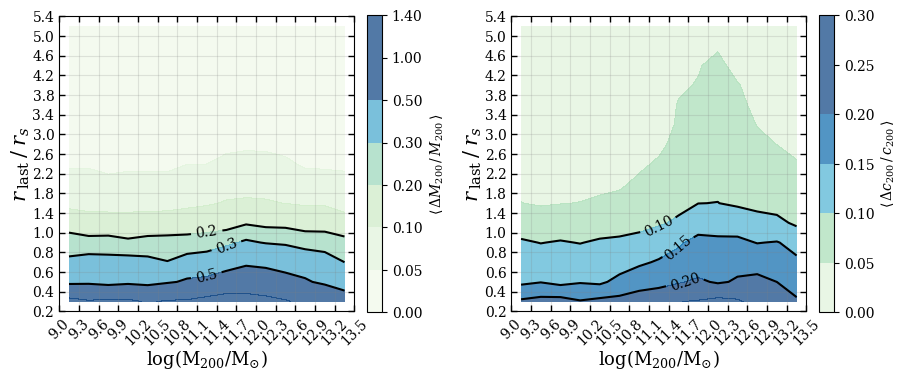

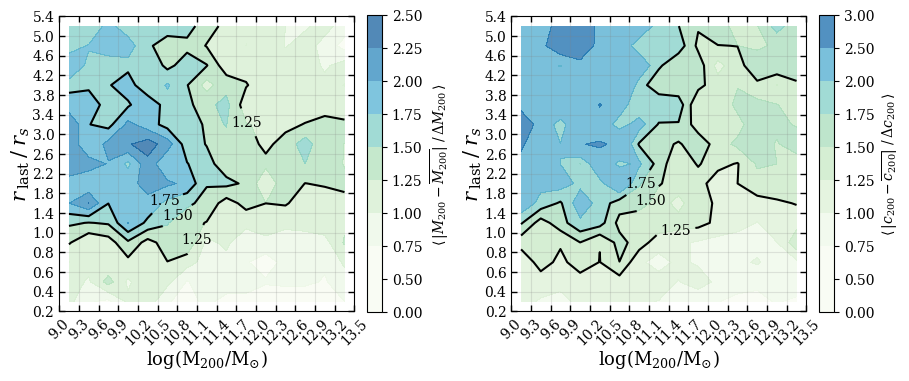

In [19]:
fig,ax1,ax2 = get_axes(0.4)
axs = [ax1,ax2]
Qs = [Qlm_per,Qc2_per]
lev = [[0.2,0.3,0.5],[0.1,0.15,0.2]]
levels = [[0,0.05,0.1,0.2,0.3,0.5,1.,1.4],
          [0,0.05,0.1,0.15,0.2,0.25,0.3]]
vmax = [0.6,0.2]
cbs = [r'$\langle\,\Delta M_{200}\,/\,M_{200}\,\rangle$',
       r'$\langle\,\Delta c_{200}\,/\,c_{200}\,\rangle$']
cmap = 'GnBu'
alpha = 0.7
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = plt.get_cmap(cmap),levels = levels[i],vmin = 0,
                     vmax = vmax[i],alpha = alpha)
    cb = fig.colorbar(cn,ax = ax,fraction = 0.046,pad = 0.04,format = '%.2f')
    cb.set_label(cbs[i],size = 10)
    cb.set_ticks(cn.levels)
    cn = ax.contour(LM,RN,Qs[i],levels = lev[i],colors = 'k')
    cn.clabel()
    ax.set_title('')
plt.savefig('../Output/reliability/Bry_M200_c200_percentage_error.pdf',bbox_inches = 'tight',dpi = 300)
    
fig,ax1,ax2 = get_axes(0.4)
axs = [ax1,ax2]
Qs = [Qlm_del,Qc2_del]
levels = [[0.0,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50],
          [0.0,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.50,3.00]]
lev = [[1.25,1.5,1.75],[1.25,1.5,1.75]]
vmin = [0.75,0.75]
cbs = [r'$\langle\,|M_{200}-\overline{M_{200}}|\,\,/\,\Delta M_{200}\,\rangle$',
       r'$\langle\,|c_{200}-\overline{c_{200}}|\,\,/\,\Delta c_{200}\,\rangle$']
manuals = [[(5,9),(6,10),(7,11),(9,5)],[(6,8),(7,9),(8,11)]]
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = plt.get_cmap(cmap),levels = levels[i],alpha = alpha,
                    vmin = vmin[i])
    cb = fig.colorbar(cn,ax = ax,fraction = 0.046,pad = 0.04,format = '%.2f')
    cb.set_ticks(cn.levels)
    cb.set_label(cbs[i],size = 10)
    cn = ax.contour(LM,RN,Qs[i],levels = lev[i],colors = 'k')
    Delsmall(cn,6)
    clabels = ax.clabel(cn, inline = True, colors = 'k', fontsize = 10, manual = manuals[i])
    for cl in clabels:
        cl.set_rotation(0)
    ax.set_title('')
plt.savefig('../Output/reliability/Bry_M200_c200_no_of_sigmas.pdf',bbox_inches = 'tight',dpi = 300)

In [399]:
def relb(key,oqt,qt,eqt,p_c,d_c):
    if eqt/qt <= p_c and (qt - oqt)/eqt <= d_c:
        ri = 1
    else:
        ri = 0
    return ri

def rela(lbf,ipm):
    if ipm == 'cusp':
        if lbf <= -1:
            ri = 1
        else:
            ri = 0
    if ipm == 'core':
        if lbf >= 5:
            ri = 1
        else:
            ri = 0
    return ri

def Relb(gdict, Ngals, keys, P_c, D_c, models = ['N','S']):
    R = np.zeros([15,15,len(models)*Ngals])
    for lm_i in range(15):
        for rn_i in range(15):
            for m in range(len(models)):
                model = models[m]
                fit = 'cusp_fit' if model == 'N' else 'core_fit'
                for i in range(Ngals):
                    gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                    i = m*Ngals + i
                    r_i = 0
                    for j in range(len(keys)):
                        key = keys[j]
                        qt,eqt = gdict[gal][fit][key]
                        oqt = gdict[gal]['original'][key]
                        if key == 'lm':
                            qt,eqt = logerr(qt,eqt)
                            oqt = 10**oqt
                        r_i += relb(key,oqt,qt,eqt,P_c[j],D_c[j])
                    ri = 1 if r_i == len(keys) else 0
                    R[lm_i,rn_i,i] = ri
    return np.mean(R,axis = 2)
        

def Relbls(gdict, Ngals, keys, P_c, D_c, models = ['N','S']):
    R = np.zeros([15,15])
    for ls_i in range(15):
        for rn_i in range(15):
            rels = 0
            ngal = 0
            for gal in gdict.keys():
                rn = gdict[gal]['original']['rn']
                ls = gdict[gal]['original']['lsig'] - 6
                lz = gdict[gal]['core_fit']['lnZ'] - gdict[gal]['cusp_fit']['lnZ']
                if (radius[rn_i] <= rn < radius[rn_i+1]) and (lsig_edges[ls_i] <= ls < lsig_edges[ls_i+1]):
                    fit = 'cusp_fit' if 'N' in gal else 'core_fit'
                    r_i = 0
                    for j in range(len(keys)):
                        key = keys[j]
                        qt,eqt = gdict[gal][fit][key]
                        oqt = gdict[gal]['original'][key]
                        if key == 'lm':
                            qt,eqt = logerr(qt,eqt)
                            oqt = 10**oqt
                            
                        r_i += relb(key, oqt, qt, eqt, P_c[j],D_c[j])
                    ri = 1 if r_i == len(keys) else 0
                    # if 'S' in gal:
                    #     continue
                    # ri = rela(lz,fit[:-4])
                    rels += ri
                    ngal += 1
                    
            if ngal:
                R[ls_i,rn_i] = rels/float(ngal)
            else:
                R[ls_i,rn_i] = 0
    return R

def Relblmls(gdict, Ngals, keys, P_c, D_c, models = ['N','S']):
    R = np.zeros([15,15])
    for lm_i in range(15):
        for ls_i in range(15):
            rels = 0
            ngal = 0
            for gal in gdict.keys():
                lm = gdict[gal]['original']['lm']
                ls = gdict[gal]['original']['lsig'] - 6
                if (masses[lm_i] <= lm < masses[lm_i+1]) and (lsig_edges[ls_i] <= ls < lsig_edges[ls_i+1]):
                    fit = 'cusp_fit' if 'N' in gal else 'core_fit'
                    r_i = 0
                    for j in range(len(keys)):
                        key = keys[j]
                        qt,eqt = gdict[gal][fit][key]
                        oqt = gdict[gal]['original'][key]
                        if key == 'lm':
                            qt,eqt = logerr(qt,eqt)
                            oqt = 10**oqt
                            
                        r_i += relb(key, oqt, qt, eqt, P_c[j], D_c[j])
                    ri = 1 if r_i == len(keys) else 0
                    rels += ri
                    ngal += 1
            if ngal:
                R[lm_i,ls_i] = rels/float(ngal)
            else:
                R[lm_i,ls_i] = 0
    return R

In [546]:
R1 = Relb(bry,50,keys,[0.3,0.3],[2,2])
R2 = Relb(bry,50,keys,[0.2,0.2],[1,1])
R3 = Relb(bry,50,keys,[0.3,0.3],[1,1])
R4 = Relb(bry,50,keys,[0.2,0.2],[2,2])
# Rls = Relbls(bry,50,keys,Pc,Dc,models)
# Rlmls = Relblmls(bry,50,keys,Pc,Dc,models)

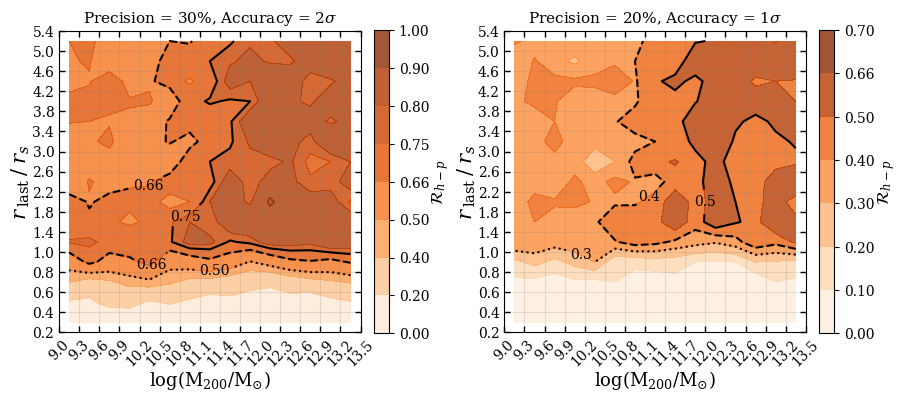

In [553]:
fig,ax1,ax2 = get_axes(0.35,title = False)
axs = [ax1,ax2]
Rs = [R1.copy(),R2.copy()]
titles = ['Precision = 30%, Accuracy = 2$\sigma$','Precision = 20%, Accuracy = 1$\sigma$']
levels = [[0,0.2,0.4,0.5,0.66,0.75,0.8,0.9,1],
          [0,0.1,0.2,0.3,0.4,0.5,0.66,0.7]]
lev = [[0.5,0.66,0.75],[0.3,0.4,0.5]]
manuals = [[(4.1,11.1),(4.1,8),(6,9),(7.5,12.6)],[(3,11),(7,8),(10,8)]]
ls = [':','--','-']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Rs[i],cmap = plt.get_cmap('Oranges'),alpha = 0.8,levels = levels[i])
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046,pad = 0.04)
    cb.set_label('$\mathcal{R}_{h-p}$',size = 12,labelpad = 0.2)
    cb.set_ticks(cn.levels)
    cn = ax.contour(LM,RN,Rs[i],colors = 'k',levels = lev[i],linestyles = ls)
    cn = Delsmall(cn,6)
    clabels = ax.clabel(cn,inline = True, colors = 'k',fontsize = 10, manual = manuals[i])
    for cl in clabels:
        cl.set_rotation(0)
    ax.set_title(titles[i],size = 11,fontname = 'serif')

plt.savefig('../Output/reliability/Bry_reliability_halo_params.pdf',bbox_inches = 'tight',dpi = 300)

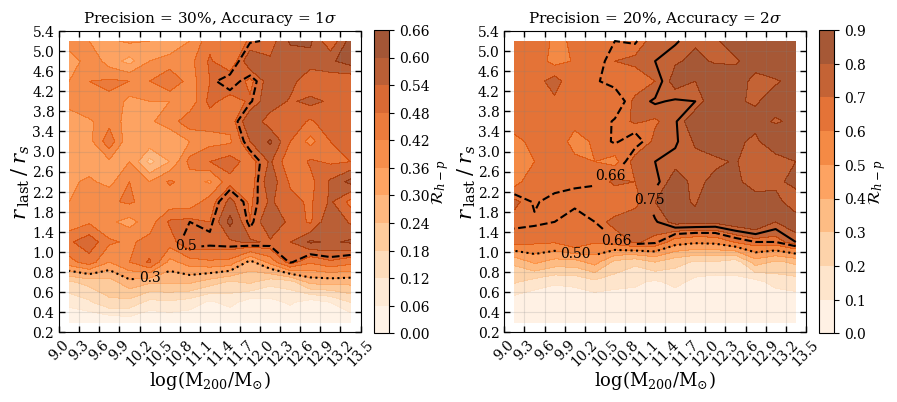

In [563]:
fig,ax1,ax2 = get_axes(0.35,title = False)
axs = [ax1,ax2]
Rs = [R3.copy(),R4.copy()]
titles = ['Precision = 30%, Accuracy = 1$\sigma$','Precision = 20%, Accuracy = 2$\sigma$']
levels = [[0,0.2,0.4,0.5,0.66,0.75,0.8,0.9,1],
          [0,0.1,0.2,0.3,0.4,0.5,0.66,0.7]]
levels = [10,10]
lev = [[0.3,0.5],[0.5,0.66,0.75]]
manuals = [[(4.1,12),(6,10)],[(3,11),(7,8),(5,10),(5,7)]]
ls = [':','--','-']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Rs[i],cmap = plt.get_cmap('Oranges'),alpha = 0.8,levels = levels[i])
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046,pad = 0.04)
    cb.set_label('$\mathcal{R}_{h-p}$',size = 12,labelpad = 0.2)
    cb.set_ticks(cn.levels)
    cn = ax.contour(LM,RN,Rs[i],colors = 'k',levels = lev[i],linestyles = ls)
    cn = Delsmall(cn,6)
    clabels = ax.clabel(cn,inline = True, colors = 'k',fontsize = 10, manual = manuals[i])
    for cl in clabels:
        cl.set_rotation(0)
    ax.set_title(titles[i],size = 11,fontname = 'serif')

plt.savefig('../Output/reliability/Bry_reliability_halo_params_2.pdf',bbox_inches = 'tight',dpi = 300)

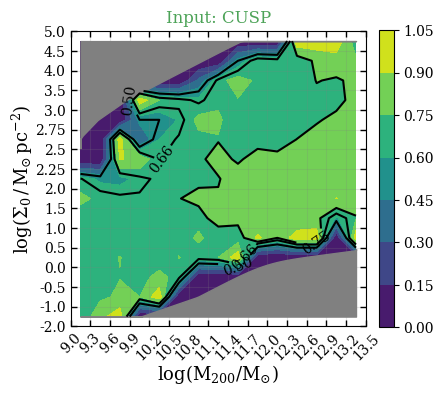

In [387]:
fig,ax,ax2 = get_axes(0.4, ykey = ['ls',ls])
ax2.remove()
cn = ax.contourf(LM,RN,Rlmls,cmap = plt.get_cmap('viridis'))
cb = fig.colorbar(cn, ax = ax, fraction = 0.046, pad = 0.04)
cn = ax.contour(LM,RN,Rlmls,colors = 'k', levels = [0.5,0.66,0.75])
cn = Delsmall(cn,4)
clabels = ax.clabel(cn)
ax.fill_between(LM_xi(Lm),LS_yi(lsig_low),np.ones(len(Lm))*14, color = 'grey',alpha = 1)
ax.fill_between(LM_xi(Lm),LS_yi(lsig_hig),np.ones(len(Lm))*0, color = 'grey',alpha = 1)

In [564]:
reliability = json.load(open('../Output/reliabilities.json','r'))

In [566]:
reliability['Relhp_1'] = R1.tolist()
reliability['Relhp_2'] = R2.tolist()
reliability['Relhp_3'] = R3.tolist()
reliability['Relhp_4'] = R4.tolist()

In [567]:
json.dump(reliability,open('../Output/reliabilities.json','w'),indent = 2)